# Chapter 2. R basics

## 2.1 Basic Introduction

After reading the previous chapter, you should already have a basic understanding of how R and Rstudio operate. Lets get started with some R basics. 

### 2.1.1 R variables

In a R session, you will need to utilize "variables" to store data. Every variable occupies "real estate" in your computer's memory [RAM](https://en.wikipedia.org/wiki/Random-access_memory)


In [2]:
a <- 8  # store 8 as variable a

Note that any text after a "#" is ignored by R


```{note}
Well-placed comments can help people (include you) to understand the functionality of the code
```

In [3]:
a # display it

[1] 2

do simple calculation between variables

In [5]:
a_squared <- a * a 

In [ ]:
a_squared # display it

```{note}
R uses the `<-` [operator to assign variables](https://stat.ethz.ch/R-manual/R-devel/library/base/html/assignOps.html). "=" can also work, but `<-` is perfered
```

### 2.1.2 R name your variables

In R, you can name variables in the following way to keep track of related variables:

In [6]:
my.var = 1

In [7]:
my_var = 1

In [8]:
# my var = 1 # This name is not valid, so do not use space in naming

ERROR: Error in parse(text = x, srcfile = src): <text>:1:4: unexpected symbol
1: my var
       ^


### 2.1.3 R functions

R have some pre-built functions for different functionality. But you can also defined your own function.

In [74]:
sqrt(a_squared) # square root

[1] 2

In [75]:
log( a_squared, base = 2) # log2 transformed

[1] 2

In [1]:
BMI_index <- function(weight_in_kg, height_in_m){
   weight_in_kg/height_in_m^2 
}

In [2]:
BMI_index(65, 1.7) # Have a try on your own data

[1] 22.49135

### 2.1.4 R Data types

R have different types of variables including numeric numbers, character strings, and other more advanced types such as factor, Boolean ("logical"; `TRUE` or `FALSE`), and data frame. 

The function `class` helps us determine what type of object we have:

In [76]:
class(a)

[1] "numeric"

In [157]:
bol <- TRUE

In [158]:
class(bol)

[1] "logical"

also, try is.*() function to check whether the input variable is certain type of data

In [159]:
is.logical(bol) # Try "TAB" after "is." to see how many functions you find

[1] TRUE

You can also use as.*() function to do input data type conversion

In [161]:
class(3.1)

[1] "numeric"

In [163]:
as.integer(3.1)

[1] 3

In [164]:
class(as.integer(3.1))

[1] "integer"

Data type coversion should be used with caution. This procedure is typically not advised for beginners due to the potential for unclear or imprecise conversions.

In [168]:
as.logical(0)

[1] FALSE

In [170]:
as.logical(3)

[1] TRUE

*What just happened?!* R maps all values other than `0` to logical `True`, and `0` to `False`. This can be useful in some cases, for example, when you want to convert all your data to Presence-Absence only.

## 2.2 R Vector, Matrix, Dataframe, Lists

Up to now, the variables we have defined contains only one number. This is not very useful for big data analysis. R has different built-in structures (objects) for data manipulation and more advanced computation. 

### 2.2.1 Vectors

The Vector is a fundamental data object / structure in R. *A vector is like a single column or row in a spreadsheet.*

Build a vector with `c` (stands for "`c`oncatenate"): 

In [148]:
v <- c(1, 2, 4, 8, 16)

In [149]:
v # Display the vector you have just created

[1]  1  2  4  8 16

Similarly, use is.* to check the data types.

In [150]:
is.vector(v) # check if v's a vector

[1] TRUE

You can do operations on vector as well

In [151]:
log(v, base = 2)

[1] 0 1 2 3 4

In [152]:
mean(v) # mean

[1] 6.2

In [153]:
length(v) # how many elements

[1] 5

Numeric indexing

In [ ]:
v[1]   # select the first element

In [4]:
v1 <- c(0.02, TRUE, 1)
v1

[1] 0.02 1.00 1.00

TRUE get converted to 1, why?

```{note}
R vectors (and matrix, array) can only store data of a single type (e.g., all numeric or all character). Attempting to merge different data types will prompt R to standardize everything to a single data type. This phenomenon is also called as *Coercion*. 
```

In [5]:
names(v1) <- c("myfirstelement","2","3") # You can give name to each elements, through names() function

In [6]:
v1 #display

myfirstelement              2              3 
          0.02           1.00           1.00

Or you can directly create a named vector by doing:

In [1]:
v2 <- c("MyName" = "Ned", "MyAge" = "Unknown", "MyJob" = "Student")

After giving name to the vector, you can do name indexing rather than numeric indexing

In [2]:
v2["MyAge"]

MyName 
 "Ned"

In [7]:
v1["myfirstelement"] # display

myfirstelement              2              3 
          0.02           1.00           1.00

In empirical cases, you will normally have a vector with unsorted order, like this:

In [34]:
v3 <- c(2020,2012,2030,2024)

How to order it from low to high? (clue: ?sort(), ?order())

In [35]:
sort(v3) # you can complete by sort()

[1] 2012 2020 2024 2030

In [36]:
v3[order(v3)] # order return the ordered index like the numerical indexing mentioned previously 

[1] 2012 2020 2024 2030

In [37]:
order(v3) # for example, according to the order() function the smallest number should be the second place of the vector, let's try

[1] 2 1 4 3

In [38]:
v3[2] # Is it?

[1] 2012

You can also do subsetting (indexing) by the logical value, for example, we want to only retain the year <= 2024:

In [39]:
logical_vector = c(TRUE,TRUE,FALSE,TRUE)

In [40]:
v3[logical_vector] # You see, the FALSE in the third position leads to removal of 2023

[1] 2020 2012 2024

In [41]:
v3[ v3<= 2024] # You can finish this task in a more intuitive way

[1] 2020 2012 2024

Operators like `<=` can only work with number, what if we have chracters? try: `%in%`. 

In [43]:
v2[ v2 %in% c("Ned","Unknown") ]  # So this will only display the v2 with value have 'Ned', "Unknown"

MyName     MyAge 
    "Ned" "Unknown"


### 2.2.2 Matrices and arrays

A R "matrix" is a 2 dimensional vector (has both rows and columns). On the other word, the matrix is built on the top of vector.

Try this:

In [8]:
1:36 # you can generate a series of number by "start:end"

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36

In [9]:
seq(from = 1,to = 100,length.out = 36) # or you can generate a more complicated series sequence by using seq()function, try ?seq()

[1]   1.000000   3.828571   6.657143   9.485714  12.314286  15.142857
 [7]  17.971429  20.800000  23.628571  26.457143  29.285714  32.114286
[13]  34.942857  37.771429  40.600000  43.428571  46.257143  49.085714
[19]  51.914286  54.742857  57.571429  60.400000  63.228571  66.057143
[25]  68.885714  71.714286  74.542857  77.371429  80.200000  83.028571
[31]  85.857143  88.685714  91.514286  94.342857  97.171429 100.000000

In [10]:
my.mat1 <- matrix(seq(from = 1,to = 100,length.out = 36), 6, 6) # place the vector by
my.mat1

1.000000,17.97143,34.94286,51.91429,68.88571,85.85714
3.828571,20.80000,37.77143,54.74286,71.71429,88.68571
6.657143,23.62857,40.60000,57.57143,74.54286,91.51429
9.485714,26.45714,43.42857,60.40000,77.37143,94.34286
12.314286,29.28571,46.25714,63.22857,80.20000,97.17143
15.142857,32.11429,49.08571,66.05714,83.02857,100.00000


you can order the elements of a matrix by row instead of column (default).

In [18]:
my.mat1 <- matrix(seq(from = 1,to = 100,length.out = 36), 6, 6, byrow=TRUE) # have a close look at the element order within the matrix above and below.
my.mat1

1.00000,3.828571,6.657143,9.485714,12.31429,15.14286
17.97143,20.800000,23.628571,26.457143,29.28571,32.11429
34.94286,37.771429,40.600000,43.428571,46.25714,49.08571
51.91429,54.742857,57.571429,60.400000,63.22857,66.05714
68.88571,71.714286,74.542857,77.371429,80.20000,83.02857
85.85714,88.685714,91.514286,94.342857,97.17143,100.00000


In [12]:
dim(my.mat1) #get the size of the matrix

[1] 6 6

In [13]:
colMeans(my.mat1) # get the means for each column, similarly try rowMeans()

[1] 43.42857 46.25714 49.08571 51.91429 54.74286 57.57143

In [14]:
log(my.mat1)  # log() can also work in Matrix

0.000000,1.342492,1.895690,2.249787,2.510760,2.717529
2.888783,3.034953,3.162457,3.275526,3.377100,3.469301
3.553714,3.631553,3.703768,3.771118,3.834216,3.893568
3.949594,4.002647,4.053026,4.100989,4.146756,4.190520
4.232449,4.272690,4.311374,4.348618,4.384524,4.419185
4.452685,4.485099,4.516495,4.546936,4.576477,4.605170


like R vectors, R will do the same sort of type homogenization as R vectors. 

Try inserting a text value in `my.mat1`and see what happens: 

In [19]:
str(my.mat1) # str() function can be used to display the data types within the matrix

 num [1:6, 1:6] 1 18 34.9 51.9 68.9 ...


In [20]:
my.mat1[1,1] <- "one"
my.mat1

one,3.82857142857143,6.65714285714286,9.48571428571429,12.3142857142857,15.1428571428571
17.9714285714286,20.8,23.6285714285714,26.4571428571429,29.2857142857143,32.1142857142857
34.9428571428571,37.7714285714286,40.6,43.4285714285714,46.2571428571429,49.0857142857143
51.9142857142857,54.7428571428571,57.5714285714286,60.4,63.2285714285714,66.0571428571429
68.8857142857143,71.7142857142857,74.5428571428571,77.3714285714286,80.2,83.0285714285714
85.8571428571429,88.6857142857143,91.5142857142857,94.3428571428571,97.1714285714286,100


In [21]:
str(my.mat1) # str() function can be used to display the data types within the matrix

 chr [1:6, 1:6] "one" "17.9714285714286" "34.9428571428571" ...


inserting a string in one location converted all the elements of the matrix to the `chr` (string) data type.

Wait a minute! What if I want to add a new column to the matrix? Let's try

In [27]:
column_to_add = c("A","B","C","D","E","F")

In [28]:
my.mat1 <- matrix(seq(from = 1,to = 100,length.out = 36), 6, 6, byrow=TRUE) # Create a matrix


In [29]:
str(my.mat1)

 num [1:6, 1:6] 1 18 34.9 51.9 68.9 ...


In [30]:
my.mat2 = cbind(my.mat1, column_to_add) # cbind means Take a sequence of vector, matrix or data-frame arguments and combine by columns. Try rbind() for combine by rows.

In [31]:
str(my.mat2) # look at the first line

 chr [1:6, 1:7] "1" "17.9714285714286" "34.9428571428571" ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:7] "" "" "" "" ...


In [32]:
my.mat2

,,,,,,column_to_add
1,3.82857142857143,6.65714285714286,9.48571428571429,12.3142857142857,15.1428571428571,A
17.9714285714286,20.8,23.6285714285714,26.4571428571429,29.2857142857143,32.1142857142857,B
34.9428571428571,37.7714285714286,40.6,43.4285714285714,46.2571428571429,49.0857142857143,C
51.9142857142857,54.7428571428571,57.5714285714286,60.4,63.2285714285714,66.0571428571429,D
68.8857142857143,71.7142857142857,74.5428571428571,77.3714285714286,80.2,83.0285714285714,E
85.8571428571429,88.6857142857143,91.5142857142857,94.3428571428571,97.1714285714286,100,F


In [33]:
# log(my.mat2[1,1]) # try use this code to test whether you can do calculation on this character matrix

ERROR: Error in log(my.mat2[1, 1]): non-numeric argument to mathematical function


Ok, our matrix `my.mat2` all transfered from numeric into character (string) at this moment. As character can not be used for calculation, what if we want to retain this `column_to_add` in the data without changing the other numeric data type? This will be solved in the next sections 2.2.3.

### 2.2.3 Data frames

Data frames are a fundamental and versatile data structure in R, offering a crucial advantage over matrices and vectors. Unlike matrices and vectors, R data frames can accommodate heterogeneous data types in each column, such as numeric values, strings, and boolean values, or even a mix of these data types, resembling the structure of a typical spreadsheet. As a result, data frames have become a cornerstone in R programming, widely utilized by statistical analysis and plotting functions as well as various packages within the R ecosystem. 

Let's build and manipulate a dataframe. First create three vectors:

In [166]:
column1 <- seq(from = 1,to = 10, by = 1)
column1

[1]  1  2  3  4  5  6  7  8  9 10

In [167]:
column2 <- c( rep("A", 5), rep("C", 5) )   # function rep() can be used to repeat an input for several times. try ?rep()
column2

[1] "A" "A" "A" "A" "A" "C" "C" "C" "C" "C"

In [264]:
set.seed(2024) # seed for random numbers
column3 <- c( rnorm(n = 5,mean = 2.8,sd = 1.5), rnorm(n = 5,mean = 2,sd = 1) ) # 10 random numbers from two different normal distribution
column3

[1] 4.2729541 3.5030726 2.6380430 2.4806827 4.5371477 3.2923548 2.5346471
 [8] 1.8729653 0.7751246 0.8786487

Now combine them into a dataframe:

In [265]:
my.df <- data.frame(column1, column2, column3)
my.df

column1,column2,column3
<dbl>,<chr>,<dbl>
1,A,4.2729541
2,A,3.5030726
3,A,2.6380430
4,A,2.4806827
5,A,4.5371477
6,C,3.2923548
7,C,2.5346471
8,C,1.8729653
9,C,0.7751246


You can easily assign names to the columns of dataframes:

In [266]:
names(my.df) <- c("MyFirstColumn", "My Second Column", "My.Third.Column")
my.df

MyFirstColumn,My Second Column,My.Third.Column
<dbl>,<chr>,<dbl>
1,A,4.2729541
2,A,3.5030726
3,A,2.6380430
4,A,2.4806827
5,A,4.5371477
6,C,3.2923548
7,C,2.5346471
8,C,1.8729653
9,C,0.7751246


And unlike matrices, you can access the contents of data frames by naming the columns directly using a $ sign:

In [267]:
my.df$MyFirstColumn # try `TAB` to complete the column name as well

[1]  1  2  3  4  5  6  7  8  9 10



And also, you can replace that column name using the `colnames` function:

In [268]:
colnames(my.df)

[1] "MyFirstColumn"    "My Second Column" "My.Third.Column"

In [269]:
colnames(my.df)[1] <- "Sample_ID"
colnames(my.df)[2] <- "Group"
colnames(my.df)[3] <- "Value"
my.df

Sample_ID,Group,Value
<dbl>,<chr>,<dbl>
1,A,4.2729541
2,A,3.5030726
3,A,2.6380430
4,A,2.4806827
5,A,4.5371477
6,C,3.2923548
7,C,2.5346471
8,C,1.8729653
9,C,0.7751246


You can also access elements by using numerical indexing:  That is, you asked R to return values of `my.df` in all Rows (therefore, nothing before the comma), and the first column (`1` after the comma). 

In [189]:
my.df[,1]

[1]  1  2  3  4  5  6  7  8  9 10

You can also add numeric index (1, as the first row) to get the first row, first column element.

In [190]:
my.df[1,1]

[1] 1

Instead of the numeric index, you could also use the name as the index.

In [176]:
my.df[,c("Group","Value")] # show two specific columns only

Group,Value
<chr>,<dbl>
A,4.9819694
A,4.4687150
A,3.8920287
A,3.7871218
A,5.1580985
C,3.2923548
C,2.5346471
C,1.8729653
C,0.7751246


You can check whether a particular object is a dataframe data structure with:

In [177]:
class(my.df)

[1] "data.frame"

You can check the structure of a dataframe with `str()`:

In [178]:
str(my.df)

'data.frame':	10 obs. of  3 variables:
 $ Sample_ID: num  1 2 3 4 5 6 7 8 9 10
 $ Group    : chr  "A" "A" "A" "A" ...
 $ Value    : num  4.98 4.47 3.89 3.79 5.16 ...


You can print the column names and top few rows with `head()`:

In [179]:
head(my.df) # try get the bottom few rows with `tail()`:

,Sample_ID,Group,Value
,<dbl>,<chr>,<dbl>
1,1,A,4.981969
2,2,A,4.468715
3,3,A,3.892029
4,4,A,3.787122
5,5,A,5.158098
6,6,C,3.292355


#### Formula used in R

In R, a formula is a symbolic representation of a statistical model or a relationship between variables

A typical formula looks like:
*response_variable ~ predictor_variable1 + predictor_variable2 + ...*

Here, the `~` symbol separates the response variable (dependent variable) from the predictor variables (independent variables). The `+` symbol is used to specify multiple predictor variables in the formula.


If we consider each row in our `my.df` dataframe as a sample observation, with the Group column denoting the type of treatment received and the Value column representing the final measurement of the response variable, how can we determine the significance of the treatment effect?

In [270]:
wilcox.test(formula = Value ~  Group, data = my.df) # When we set alpha = 0.05, you find no significant difference between Group A, Group C


	Wilcoxon rank sum exact test

data:  Value by Group
W = 22, p-value = 0.05556
alternative hypothesis: true location shift is not equal to 0


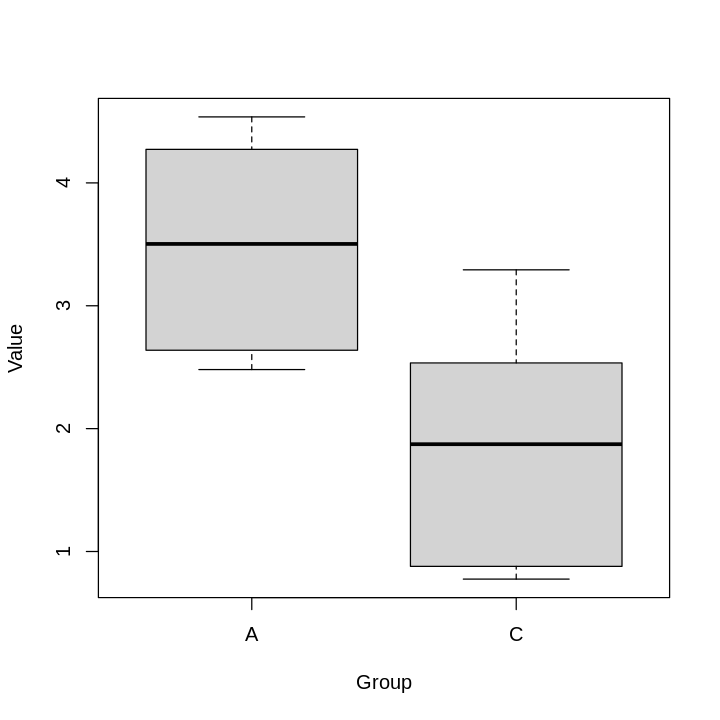

In [271]:
boxplot(formula = Value ~  Group, data = my.df)

#### Case Exercise 2. The first statistics

After careful review, your superviser recommanded you to do a parametric test (student's t test) rather than a rank-based non-parametric test (wilcox's test). Why it is reasonable? How to do it in R?  (clue: ?t.test() ?shapiro.test())

### 2.2.4 Lists

List is another important data structure widely used in R. Essentially, a list functions as a structured assembly of objects, allowing for the inclusion of different types of variables and data entities  (e.g., you can put dataframe and vector together) in a specific *order*.

Try this:

In [135]:
my.list <- list(genus=c("Bifidobacterium","Akkermansia"), rel_abundance=c(20 , 10))
my.list

$genus
[1] "Bifidobacterium" "Akkermansia"    

$rel_abundance
[1] 20 10

In [140]:
my.list[["genus"]] # Get the list item by using nested square brackets 

[1] "Bifidobacterium" "Akkermansia"

In [ ]:
my.list$genus # or do it this way. Quite similar to those in dataframe, right?

Or, you can access contents of a list item using the list order index:

In [136]:
my.list[[1]]

[1] "Bifidobacterium" "Akkermansia"

In [137]:
my.list[[1]][1] # remeber, each elements of my.list is vector, therefore, we can apply the rule of vector to it

[1] "Bifidobacterium"

Maybe, you will have a guess now that dataframe object is actually a data structure built upon list object

### 2.2.5 Matrix vs Dataframe

While data frames offer considerable flexibility and convenience for statistical analyses, plotting, and data output in R, there are instances where utilizing R matrices becomes necessary due to performance considerations. Data frames may exhibit decreased efficiency when large-scale mathematical computations or operations, such as matrix-vector multiplications or other linear algebra tasks, need to be executed. In such scenarios, converting a data frame to a matrix can significantly enhance computational speed and efficiency.

To see the difference in memory usage of matrices vs dataframes, try this:

In [44]:
my.mat1 <- matrix(seq(from = 1,to = 100,length.out = 36), 6, 6, byrow=TRUE)
my.mat1 # Again, create one matrix

1.00000,3.828571,6.657143,9.485714,12.31429,15.14286
17.97143,20.800000,23.628571,26.457143,29.28571,32.11429
34.94286,37.771429,40.600000,43.428571,46.25714,49.08571
51.91429,54.742857,57.571429,60.400000,63.22857,66.05714
68.88571,71.714286,74.542857,77.371429,80.20000,83.02857
85.85714,88.685714,91.514286,94.342857,97.17143,100.00000


In [45]:
my.mat12df = as.data.frame(my.mat1)
my.mat12df

V1,V2,V3,V4,V5,V6
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.00000,3.828571,6.657143,9.485714,12.31429,15.14286
17.97143,20.800000,23.628571,26.457143,29.28571,32.11429
34.94286,37.771429,40.600000,43.428571,46.25714,49.08571
51.91429,54.742857,57.571429,60.400000,63.22857,66.05714
68.88571,71.714286,74.542857,77.371429,80.20000,83.02857
85.85714,88.685714,91.514286,94.342857,97.17143,100.00000


In [46]:
object.size(my.mat1) # returns size of an R object (variable) in bytes

504 bytes

In [47]:
object.size(my.mat12df)

1616 bytes

Quite a big difference!

## 2.3 Further reading 


Search online for "R tutorial".

Explore more functionality by using different R packages designed for different purpose! *Remember, all R packages come with pdf guides/documentation!* 

### Some useful R packages

|Packages|Description|
|:-|:-|
|tidyr   | Used in data wrangling, provides functions like gather, spread, and separate, which facilitate the transformation of data between wide and long formats. |
|dplyr |The dplyr package provides a concise and intuitive syntax for data manipulation tasks. Its functions, such as filter, select, mutate, and summarize, allow you to efficiently subset, transform, and summarize data frames. |
|ggplot2 | nice package for data visualization |
|stringr | string manipulation and text mining |


### Some useful online tutorial

|Source|Description|
|:-|:-|
| https://r4ds.had.co.nz/   | R for Data Science |

